In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('kk.jpg')

from sklearn.cluster import KMeans

(1080, 1080, 3)


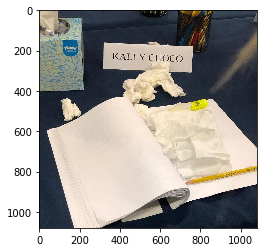

In [7]:
img = cv2.imread('kk.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [8]:
X=img.reshape((-1,3))

In [9]:
X.shape

(1166400, 3)

In [10]:
kmeans=KMeans(n_clusters=5)

In [11]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
centers=kmeans.cluster_centers_

In [13]:
print(centers)

[[ 56.96745081  63.6843773   72.85159931]
 [240.72882122 225.33683042 208.96905832]
 [144.02096819 142.79803826 114.80756642]
 [ 29.65465672  35.84584163  47.76457561]
 [212.15352629 197.76190728 176.14781971]]


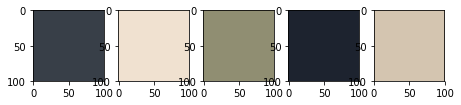

In [14]:
colors=[]

plt.figure(figsize=(15,15))

for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)
    square=np.zeros((100,100,3),dtype='uint8')
    square[:,:,:]=color
    plt.imshow(square)
plt.show()
    
    

In [15]:
kmeans.labels_


array([4, 4, 4, ..., 3, 3, 3])

In [16]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([111738, 387200,  96304, 400627, 170531], dtype=int64))

In [18]:
# Reprint the Original Image
labels=kmeans.labels_
print(labels)

[4 4 4 ... 3 3 3]


In [19]:
new_img  = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]

print(new_img.shape)

(1166400, 3)


In [20]:
new_img = new_img.reshape(img.shape)

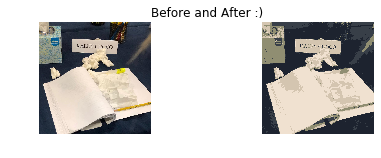

In [21]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((1080, 1080, 3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()